#### 2.2 数据预处理

常使用 `pandas` 软件包。

推荐单独去学一下。

下面介绍Pandas预处理原始数据，并将原始数据转换成张量格式。

##### 2.2.1 读取数据集

首先创建一个人工数据集，并存储在 CSV（逗号分隔值）文件 `./data/house_tint.csv` 中。

In [1]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')

with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # 列名
    f.write('NA,Pave,127500\n') # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')


加载数据集

In [2]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


##### 2.2.2 处理缺失值

插值法和删除法

插值法是用一个替代值来弥补缺失值

删除法则是直接忽略缺失值。

这里使用插值法。

In [3]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


对于inputs中的类别值或离散值，将 `NaN` 视为一个类别。

由于“巷子类型”（“Alley”）列只接受两种类型的类别值“Pave”和“NaN”，pandas可以自动将此列转换为两列“Alley_Pave”和“Alley_nan”。

巷子类型为“Pave”的行会将“Alley_Pave”的值设置为1，“Alley_nan”的值设置为0。缺少巷子类型的行会
将“Alley_Pave”和“Alley_nan”分别设置为0和1。

In [4]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


##### 2.2.3 转换为张量格式
转换为张量格式之后，就可以使用2.1节引入的张量函数进行进一步操作。

In [5]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))

X, y


(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

### 小结
- pandas软件包是Python中常用的数据分析工具，pandas可以与张量兼容
- 用pandas处理缺失数据的时候，可以根据情况选择插值法和删除法。

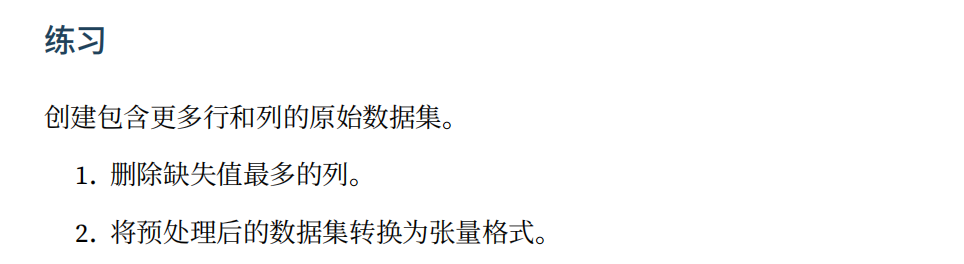